# Import libraries

In [2]:
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation
import matplotlib.pyplot as plt  # For data visualization
from PIL import Image  # For image processing
import os  # For interacting with the file system
import shutil
from sklearn.model_selection import train_test_split

# Paths to Testing Data

In [47]:
image_directory = '/Users/kenny/Documents/DS Projects/Skin Analyzer/ISIC/ISIC_2020_Test_Input'
metadata_path = '/Users/kenny/Documents/DS Projects/Skin Analyzer/ISIC/ISIC_2020_Test_Metadata.csv'

# Load the metadata

In [48]:
metadata = pd.read_csv(metadata_path)
print(metadata.head())

          image     patient  age_approx anatom_site_general     sex
0  ISIC_0052060  IP_3579794          70                 NaN    male
1  ISIC_0052349  IP_7782715          40     lower extremity    male
2  ISIC_0058510  IP_7960270          55               torso  female
3  ISIC_0073313  IP_6375035          50               torso  female
4  ISIC_0073502  IP_0589375          45     lower extremity  female


# Function to display images

In [49]:
def display_images(image_paths, n=5):
    plt.figure(figsize=(20, 10))
    for i, image_path in enumerate(image_paths[:n]):
        plt.subplot(1, n, i + 1)
        image = Image.open(image_path)
        plt.imshow(image)
        plt.axis('off')
    plt.show()

# Sample of images

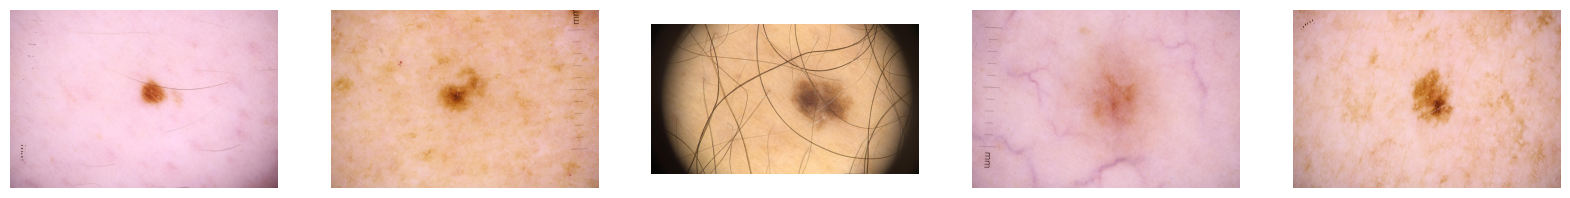

In [50]:
sample_image_paths = [os.path.join(image_directory, img) for img in os.listdir(image_directory)[:5]]
display_images(sample_image_paths)

# Preprocessing Function

In [7]:
def preprocess_image(image_path, save_path, target_size=(224, 224)):
    with Image.open(image_path) as img:
        # Resize image
        img = img.resize(target_size)
        # Normalize pixel values if needed
        img_array = np.array(img) / 255.0
        # Save preprocessed image
        img = Image.fromarray((img_array * 255).astype(np.uint8))
        img.save(save_path)


# Save the preprocessed images

In [9]:
processed_image_directory = '/Users/kenny/Documents/DS Projects/Skin Analyzer/ISIC/Processed_Testing_Images'
os.makedirs(processed_image_directory, exist_ok=True)

# Apply Preprocessing to All Images

In [10]:
# Loop through all JPEG images in the original directory
for filename in os.listdir(image_directory):
    if filename.endswith(".jpg"):
        # Construct the full path to the original image
        image_path = os.path.join(image_directory, filename)
        # Construct the path to save the preprocessed image
        save_path = os.path.join(processed_image_directory, filename)
        # Preprocess and save the image
        preprocess_image(image_path, save_path)


# Visualizing Preprocessed Images

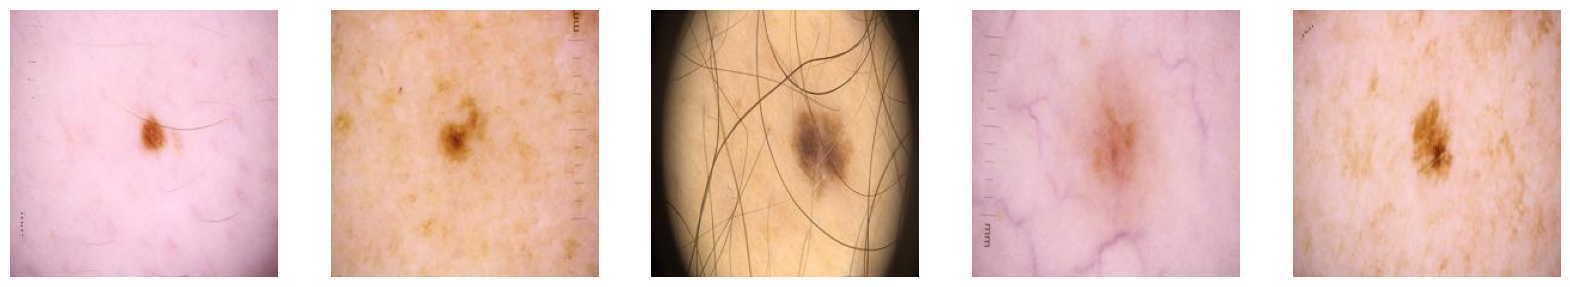

In [12]:
# Function to display preprocessed images
def display_preprocessed_images(image_paths, n=5):
    plt.figure(figsize=(20, 10))
    for i, image_path in enumerate(image_paths[:n]):
        plt.subplot(1, n, i + 1)
        img = Image.open(image_path)
        plt.imshow(img)
        plt.axis('off')
    plt.show()

# Get a few preprocessed image paths
sample_preprocessed_paths = [os.path.join(processed_image_directory, img) for img in os.listdir(processed_image_directory)[:5]]
display_preprocessed_images(sample_preprocessed_paths)

# Paths to Training Data

In [51]:
image_directory = '/Users/kenny/Documents/DS Projects/Skin Analyzer/ISIC/ISIC_2020_Training_Data'
metadata_path = '/Users/kenny/Documents/DS Projects/Skin Analyzer/ISIC/ISIC_2020_Training_Metadata_v2.csv'

# Load the metadata

In [14]:
metadata = pd.read_csv(metadata_path)
print(metadata.head())

     image_name  patient_id   lesion_id     sex  age_approx  \
0  ISIC_2637011  IP_7279968  IL_7972535    male        45.0   
1  ISIC_0015719  IP_3075186  IL_4649854  female        45.0   
2  ISIC_0052212  IP_2842074  IL_9087444  female        50.0   
3  ISIC_0068279  IP_6890425  IL_4255399  female        45.0   
4  ISIC_0074268  IP_8723313  IL_6898037  female        55.0   

  anatom_site_general_challenge diagnosis benign_malignant  target  
0                     head/neck   unknown           benign       0  
1               upper extremity   unknown           benign       0  
2               lower extremity     nevus           benign       0  
3                     head/neck   unknown           benign       0  
4               upper extremity   unknown           benign       0  


# Function to display images

In [15]:
def display_images(image_paths, n=5):
    plt.figure(figsize=(20, 10))
    for i, image_path in enumerate(image_paths[:n]):
        plt.subplot(1, n, i + 1)
        image = Image.open(image_path)
        plt.imshow(image)
        plt.axis('off')
    plt.show()

# Sample of images

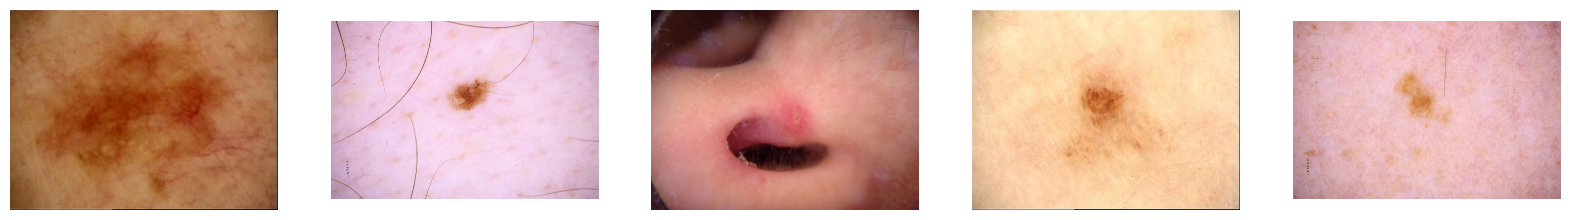

In [16]:
sample_image_paths = [os.path.join(image_directory, img) for img in os.listdir(image_directory)[:5]]
display_images(sample_image_paths)

# Preprocessing Function

In [17]:
def preprocess_image(image_path, save_path, target_size=(224, 224)):
    with Image.open(image_path) as img:
        # Resize image
        img = img.resize(target_size)
        # Normalize pixel values if needed
        img_array = np.array(img) / 255.0
        # Save preprocessed image
        img = Image.fromarray((img_array * 255).astype(np.uint8))
        img.save(save_path)


# Save the preprocessed images

In [18]:
processed_image_directory = '/Users/kenny/Documents/DS Projects/Skin Analyzer/ISIC/Processed_Training_Images'
os.makedirs(processed_image_directory, exist_ok=True)

# Apply Preprocessing to All Images

In [19]:
# Loop through all JPEG images in the original directory
for filename in os.listdir(image_directory):
    if filename.endswith(".jpg"):
        # Construct the full path to the original image
        image_path = os.path.join(image_directory, filename)
        # Construct the path to save the preprocessed image
        save_path = os.path.join(processed_image_directory, filename)        
        # Preprocess and save the image
        preprocess_image(image_path, save_path)


# Visualizing Preprocessed Images

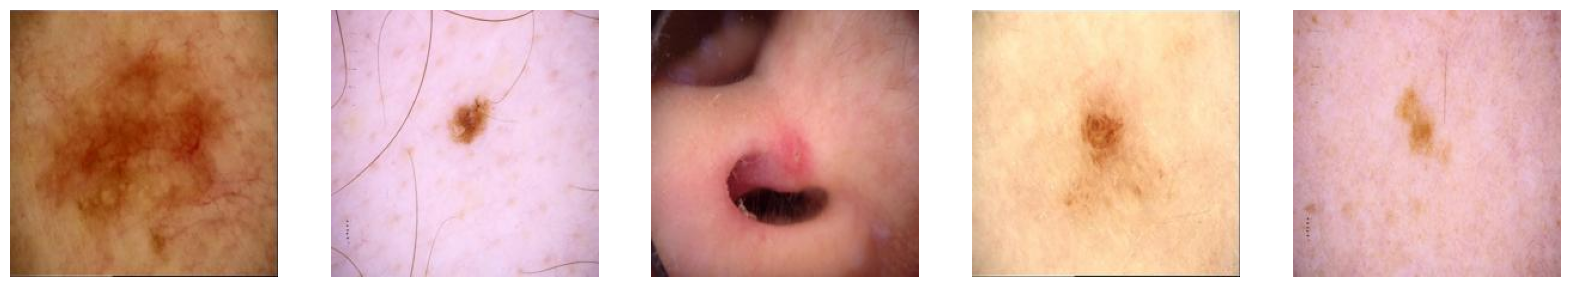

In [21]:
# Function to display preprocessed images
def display_preprocessed_images(image_paths, n=5):
    plt.figure(figsize=(20, 10))
    for i, image_path in enumerate(image_paths[:n]):
        plt.subplot(1, n, i + 1)
        img = Image.open(image_path)
        plt.imshow(img)
        plt.axis('off')
    plt.show()

# Get a few preprocessed image paths
sample_preprocessed_paths = [os.path.join(processed_image_directory, img) for img in os.listdir(processed_image_directory)[:5]]
display_preprocessed_images(sample_preprocessed_paths)

# Load and Merge MetaData

In [53]:
# Load the metadata
test_metadata_path = '/Users/kenny/Documents/DS Projects/Skin Analyzer/ISIC/ISIC_2020_Test_Metadata.csv'
train_metadata_path = '/Users/kenny/Documents/DS Projects/Skin Analyzer/ISIC/ISIC_2020_Training_Metadata_v2.csv'
ground_truth_path = '/Users/kenny/Documents/DS Projects/Skin Analyzer/ISIC/ISIC_2020_Training_GroundTruth_GoldStandard.csv'

test_metadata = pd.read_csv(test_metadata_path)
train_metadata = pd.read_csv(train_metadata_path)
ground_truth = pd.read_csv(ground_truth_path)

# Merging training metadata with ground truth labels
# Ensure the key columns match and adjust column names as needed
train_data = pd.merge(train_metadata, ground_truth, on='image_name')


# Merge Images to MetaDatas

In [54]:
# Load the ground truth data
ground_truth_path = '/Users/kenny/Documents/DS Projects/Skin Analyzer/ISIC/ISIC_2020_Training_GroundTruth_GoldStandard.csv'
ground_truth = pd.read_csv(ground_truth_path)

In [55]:
# Define main image directories
train_dir = '/Users/kenny/Documents/DS Projects/Skin Analyzer/ISIC/Processed_Training_Images'
validation_dir = '/Users/kenny/Documents/DS Projects/Skin Analyzer/ISIC/Processed_Validation_Images'

In [56]:
# Create subdirectories for each class within the training and validation directories
for class_name in ground_truth['benign_malignant'].unique():
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(validation_dir, class_name), exist_ok=True)

for index, row in ground_truth.iterrows():
    image_name = row['image_name'] + '.jpg'  # Add extension if needed
    class_name = row['benign_malignant']
    source_path = os.path.join(train_dir, image_name)
    destination_path = os.path.join(train_dir, class_name, image_name)
    if os.path.isfile(source_path):
        shutil.move(source_path, destination_path)

# Remove Duplicate Images

In [ ]:
# Path to the CSV file listing duplicate images
duplicates_path = '/Users/kenny/Documents/DS Projects/Skin Analyzer/ISIC/ISIC_2020_Training_Duplicates.csv'

# Directories containing your processed images
training_images_directory = '/Users/kenny/Documents/DS Projects/Skin Analyzer/ISIC/Processed_Training_Images'

# Load the list of duplicates
duplicates = pd.read_csv(duplicates_path)

# Iterate over the rows in the duplicates dataframe
for index, row in duplicates.iterrows():
    # Construct the filename for the first image in the duplicate pair
    image_to_remove = row['image_name_1'] + '.jpg'
    
    # Define the path to this image in the training directory
    file_path = os.path.join(training_images_directory, image_to_remove)
    
    # Check if the file exists before attempting to remove it
    if os.path.exists(file_path):
        print(f"Removing {file_path}")
        os.remove(file_path)
    else:
        print(f"File not found: {file_path}")


# Classify Bengine or Malignant

In [75]:
print(train_data.columns)

Index(['image_name', 'patient_id_x', 'lesion_id', 'sex_x', 'age_approx_x',
       'anatom_site_general_challenge_x', 'diagnosis_x', 'benign_malignant_x',
       'target_x', 'patient_id_y', 'sex_y', 'age_approx_y',
       'anatom_site_general_challenge_y', 'diagnosis_y', 'benign_malignant_y',
       'target_y'],
      dtype='object')


In [76]:
# Path to the validation images directory
validation_images_directory = '/Users/kenny/Documents/DS Projects/Skin Analyzer/ISIC/Processed_Validation_Images'

In [92]:
# Loop through the DataFrame and move each validation image to the corresponding subdirectory
for index, row in train_data.iterrows():
    image_name = row['image_name'] + '.jpg'
    class_name = row['benign_malignant_y']
    src_path = os.path.join(training_images_directory, image_name)
    dst_path = os.path.join(training_images_directory, class_name, image_name)
    if os.path.exists(src_path):
        shutil.move(src_path, dst_path)

# Create Validation Images

In [93]:
# Paths to CSV files
train_metadata_path = '/Users/kenny/Documents/DS Projects/Skin Analyzer/ISIC/ISIC_2020_Training_Metadata_v2.csv'
ground_truth_path = '/Users/kenny/Documents/DS Projects/Skin Analyzer/ISIC/ISIC_2020_Training_GroundTruth_GoldStandard.csv'

In [94]:
# Load metadata and ground truth
train_metadata = pd.read_csv(train_metadata_path)
ground_truth = pd.read_csv(ground_truth_path)

In [ ]:
# Path to your metadata CSV file
metadata_path = '/Users/kenny/Documents/DS Projects/Skin Analyzer/ISIC/ISIC_2020_Training_Metadata_v2.csv'  # Adjust this to the correct path

# Load the metadata into a DataFrame
metadata = pd.read_csv(metadata_path)

# Directories
validation_images_directory = '/Users/kenny/Documents/DS Projects/Skin Analyzer/ISIC/Processed_Validation_Images'
benign_dir = os.path.join(validation_images_directory, 'benign')
malignant_dir = os.path.join(validation_images_directory, 'malignant')

# Ensure the benign and malignant directories exist
os.makedirs(benign_dir, exist_ok=True)
os.makedirs(malignant_dir, exist_ok=True)

# Loop through all images in the validation directory
for img_name in os.listdir(validation_images_directory):
    # Skip directories
    if os.path.isdir(os.path.join(validation_images_directory, img_name)):
        continue
    
    # Find the row in the metadata DataFrame for the current image
    row = metadata.loc[metadata['image_name'] == img_name.split('.')[0]]
    
    # Determine the class of the image based on the 'target' or 'benign_malignant' column
    # Adjust the column name as per your CSV structure, here we assume 'benign_malignant'
    if not row.empty:
        class_name = row.iloc[0]['benign_malignant']
        
        # Construct the source and destination paths
        src_path = os.path.join(validation_images_directory, img_name)
        
        if class_name == 'benign':
            dst_path = os.path.join(benign_dir, img_name)
        elif class_name == 'malignant':
            dst_path = os.path.join(malignant_dir, img_name)
        else:
            print(f"Class name for {img_name} is unrecognized.")
            continue
        
        # Move the file
        shutil.move(src_path, dst_path)
        print(f"Moved {img_name} to {dst_path}")
    else:
        print(f"Metadata not found for {img_name}.")


# Adjust column names as necessary

In [110]:
data = pd.merge(train_metadata, ground_truth, on='image_name')

In [111]:
print(data.columns)

Index(['image_name', 'patient_id_x', 'lesion_id', 'sex_x', 'age_approx_x',
       'anatom_site_general_challenge_x', 'diagnosis_x', 'benign_malignant_x',
       'target_x', 'patient_id_y', 'sex_y', 'age_approx_y',
       'anatom_site_general_challenge_y', 'diagnosis_y', 'benign_malignant_y',
       'target_y'],
      dtype='object')


#  Stratified Split

In [112]:
# Adjust the stratify parameter to use 'target_x'
train_data, val_data = train_test_split(data, test_size=0.2, random_state=42, stratify=data['target_x'])

train_images = train_data['image_name'].tolist()
val_images = val_data['image_name'].tolist()


# Transfer Learning with ResNet50

In [3]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

2024-02-20 11:27:24.483109: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [115]:
# Load pre-trained ResNet50 model, excluding the top layer
base_model = ResNet50(weights='imagenet', include_top=False)

In [116]:
# Freeze the base model's layers to prevent being updated during the first training phase
for layer in base_model.layers:
    layer.trainable = False

In [117]:
# Add custom layers on top of ResNet50
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)  

In [118]:
# Construct the final model
model = Model(inputs=base_model.input, outputs=predictions)

In [119]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

#  Prepare the Data

In [120]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [121]:
# Initialize the data generators for training and validation sets
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_dir = '/Users/kenny/Documents/DS Projects/Skin Analyzer/ISIC/Processed_Training_Images'
validation_dir = '/Users/kenny/Documents/DS Projects/Skin Analyzer/ISIC/Processed_Validation_Images'

img_width, img_height = 224, 224
batch_size = 32

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')  # Use 'categorical' for multi-class problems

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')  # Use 'categorical' for multi-class problems

Found 26160 images belonging to 2 classes.
Found 6541 images belonging to 2 classes.


# Train the Model

In [122]:
epochs = 10

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size)


Epoch 1/10


2024-02-18 12:21:18.719242: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


817/817 [==============================] - ETA: 0s - loss: 0.0969 - accuracy: 0.9822

2024-02-18 12:38:09.808669: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


817/817 [==============================] - 1262s 2s/step - loss: 0.0969 - accuracy: 0.9822 - val_loss: 0.0896 - val_accuracy: 0.9821
Epoch 2/10
817/817 [==============================] - 1409s 2s/step - loss: 0.0915 - accuracy: 0.9822 - val_loss: 0.0908 - val_accuracy: 0.9821
Epoch 3/10
817/817 [==============================] - 1385s 2s/step - loss: 0.0902 - accuracy: 0.9822 - val_loss: 0.0947 - val_accuracy: 0.9821
Epoch 4/10
817/817 [==============================] - 3354s 4s/step - loss: 0.0899 - accuracy: 0.9822 - val_loss: 0.0902 - val_accuracy: 0.9821
Epoch 5/10
817/817 [==============================] - 2031s 2s/step - loss: 0.0900 - accuracy: 0.9822 - val_loss: 0.0912 - val_accuracy: 0.9822
Epoch 6/10
817/817 [==============================] - 1412s 2s/step - loss: 0.0898 - accuracy: 0.9822 - val_loss: 0.0892 - val_accuracy: 0.9821
Epoch 7/10
817/817 [==============================] - 1368s 2s/step - loss: 0.0893 - accuracy: 0.9822 - val_loss: 0.0899 - val_accuracy: 0.9821
Epo

# Evaluate the Model Performance

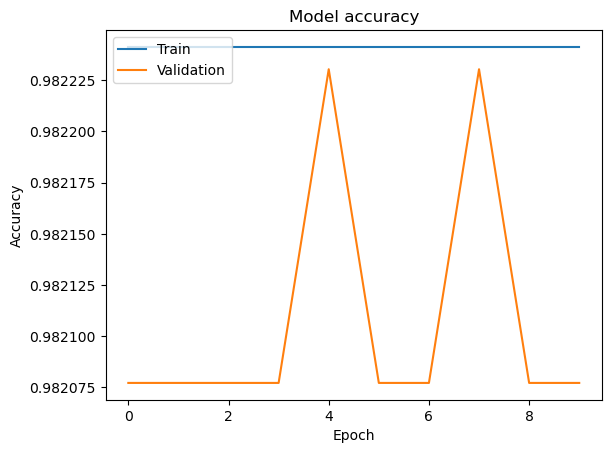

In [123]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

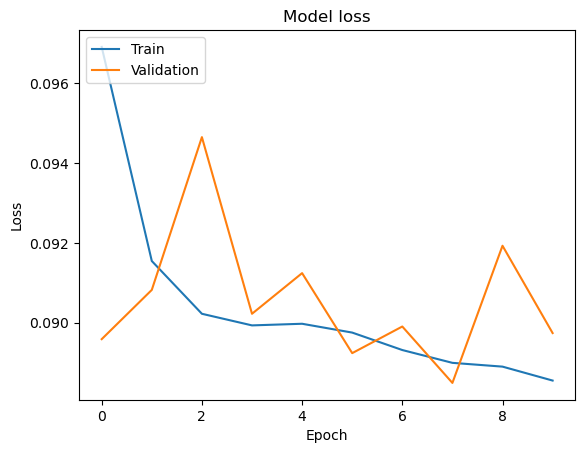

In [124]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

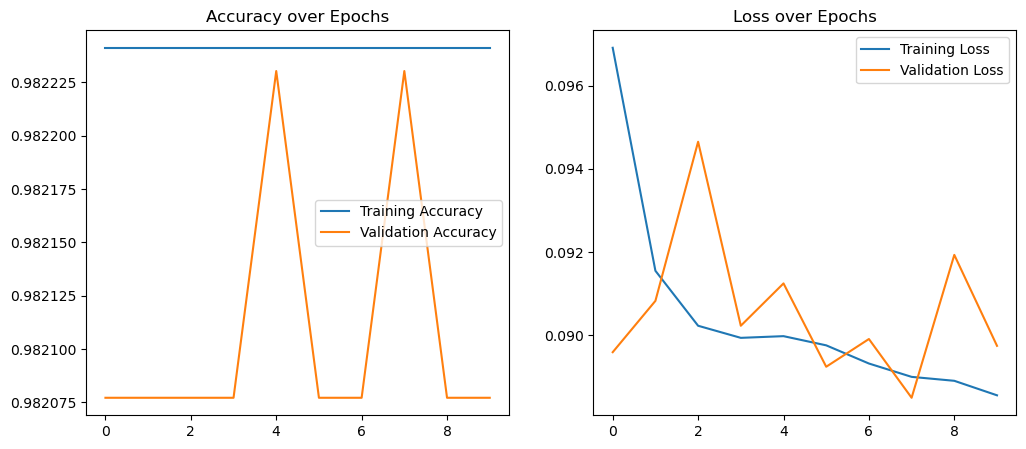

In [125]:
# Plot Training and Validation Metrics

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.legend()

plt.show()


#  Save and Load the Model

In [131]:
from tensorflow.keras.models import load_model

model.save('/Users/kenny/Documents/DS Projects/Skin Analyzer/my_skin_cancer_model.h5')
keras_model = load_model('/Users/kenny/Documents/DS Projects/Skin Analyzer/my_skin_cancer_model.h5')

# Convert the Model to Core ML Format

In [134]:
import coremltools as ct

# Convert the model to Core ML format
coreml_model = ct.convert(keras_model, inputs=[ct.ImageType()])

# Save the Core ML model
coreml_model.save('/Users/kenny/Documents/DS Projects/Skin Analyzer/MyModel.mlpackage')


2024-02-18 18:31:03.073162: I tensorflow/core/grappler/devices.cc:75] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0 (Note: TensorFlow was not compiled with CUDA or ROCm support)
2024-02-18 18:31:06.205333: I tensorflow/core/grappler/devices.cc:75] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0 (Note: TensorFlow was not compiled with CUDA or ROCm support)
When both 'convert_to' and 'minimum_deployment_target' not specified, 'convert_to' is set to "mlprogram" and 'minimum_deployment_targer' is set to ct.target.iOS15 (which is same as ct.target.macOS12). Note: the model will not run on systems older than iOS15/macOS12/watchOS8/tvOS15. In order to make your model run on older system, please set the 'minimum_deployment_target' to iOS14/iOS13. Details please see the link: https://coremltools.readme.io/docs/unified-conversion-api#target-conversion-formats
2024-02-18 18:31:09.306844: I tensorflow/core/grappler/devices.cc:75] Number of eligible